In [465]:
Sys.setlocale("LC_ALL", "en_US.UTF-8")
options(warn=-1, repr.plot.width=15, repr.plot.height=9)

[1] "en_US.UTF-8/en_US.UTF-8/en_US.UTF-8/C/en_US.UTF-8/C"

## 한우 경매
각 소의 '종류', kpn, 그리고 '최저가', '낙찰가'의 관계는?    
한우 경매 데이터를 활용한 낙찰가 예측

- 일자 : 경매 시작부터 입찰이 이루어진 며칠의 시간
- 번호 : 경매의 고유 식별자
- 출하주 : 판매자 이름
- 개체 번호 : 각 소의 고유 식별자
- 성별: 각 소의 성별 - 암(여성) , 수(남성)
- kpn : Korean Proven Bull No, 한국 입증된 황소 번호? 한우능력검정 결과에 따라 선발된 보증씨수소에 부여된 고유번호
- 계대 : 각 kpn 소의 세대
- 중량 : 무게
- 최저가 : 예약 가격
- 낙찰가 : 입찰 당첨
- 상태 : 상태
- 비고 : 각 소의 특성 (예: 흉터, 임신, kpn...)
- 종류 : 소의 종류 - '혈통우'(혈조 소)와 '큰 소'(큰 소)
- 지역 : 지역

In [466]:
beef <- read.csv("./Data/beef_train.csv")
head(beef)

,일자,번호,출하주,개체번호,성별,kpn,계대,중량,최저가,낙찰가,상태,비고,종류,지역
,<chr>,<int>,<chr>,<int>,<chr>,<dbl>,<dbl>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>
1,2021.10.13,107,서*고,150901978,암,0,2,370,430,502,낙찰,임신3개월,큰소,경상북도 고령 성주
2,2021.03.25,15,정*현,158398122,수,1218,2,220,350,399,낙찰,,혈통우,경상남도 합천
3,2021.08.09,112,유*명,160976573,수,1124,3,0,400,440,낙찰,친자일치,큰소,경상남도의령
4,2021.06.10,177,전*환,158403169,암,1283,3,260,330,447,낙찰,,혈통우,경상남도 합천
5,2021.06.29,520,마*준,157254322,수,1197,8,0,390,460,낙찰,,혈통우,전라남도 강진.완도
6,2021.07.13,319,차*원,121754204,암,0,0,0,560,551,낙찰,,큰소,전라남도 함평


In [467]:
tail(beef)

,일자,번호,출하주,개체번호,성별,kpn,계대,중량,최저가,낙찰가,상태,비고,종류,지역
,<chr>,<int>,<chr>,<int>,<chr>,<dbl>,<dbl>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>
13981,2021.09.03,66,박*숙,151498570,수,1272,2,0,320,329,낙찰,,혈통우,경상남도고성
13982,2021.09.15,9,우*환,158195133,수,1047,1,0,380,448,낙찰,친자확인,혈통우,경상북도 고령 성주
13983,2021.03.25,95,노*석,155810518,암,1225,4,230,300,446,낙찰,,혈통우,경상남도 합천
13984,2021.07.13,353,유*희,127464301,암,0,1,0,590,581,낙찰,,큰소,전라남도 함평
13985,2021.11.08,273,하*준,161430500,수,1170,8,0,0,0,대기,친자일치,큰소,경상남도의령
13986,2021.10.14,88,손*수,160862118,암,1314,3,270,360,498,낙찰,,혈통우,경상남도 합천


In [468]:
str(beef)

'data.frame':	13986 obs. of  14 variables:
 $ 일자    : chr  "2021.10.13" "2021.03.25" "2021.08.09" "2021.06.10" ...
 $ 번호    : int  107 15 112 177 520 319 235 501 38 64 ...
 $ 출하주  : chr  "서*고" "정*현" "유*명" "전*환" ...
 $ 개체번호: int  150901978 158398122 160976573 158403169 157254322 121754204 151305332 158881129 161427554 158973166 ...
 $ 성별    : chr  "암" "수" "수" "암" ...
 $ kpn     : num  0 1218 1124 1283 1197 ...
 $ 계대    : num  2 2 3 3 8 0 8 4 2 3 ...
 $ 중량    : int  370 220 0 260 0 0 280 0 0 0 ...
 $ 최저가  : int  430 350 400 330 390 560 430 390 340 370 ...
 $ 낙찰가  : int  502 399 440 447 460 551 561 417 448 439 ...
 $ 상태    : chr  "낙찰" "낙찰" "낙찰" "낙찰" ...
 $ 비고    : chr  "임신3개월" "" "친자일치" "" ...
 $ 종류    : chr  "큰소" "혈통우" "큰소" "혈통우" ...
 $ 지역    : chr  "경상북도 고령 성주" "경상남도 합천" "경상남도의령" "경상남도 합천" ...


[target column] : 낙찰가

In [469]:
subset(beef, beef$중량==0)

,일자,번호,출하주,개체번호,성별,kpn,계대,중량,최저가,낙찰가,상태,비고,종류,지역
,<chr>,<int>,<chr>,<int>,<chr>,<dbl>,<dbl>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>
3,2021.08.09,112,유*명,160976573,수,1124,3,0,400,440,낙찰,친자일치,큰소,경상남도의령
5,2021.06.29,520,마*준,157254322,수,1197,8,0,390,460,낙찰,,혈통우,전라남도 강진.완도
6,2021.07.13,319,차*원,121754204,암,0,0,0,560,551,낙찰,,큰소,전라남도 함평
8,2021.07.04,501,문*준,158881129,수,0,4,0,390,417,낙찰,"얼굴모색,꼬리확인",혈통우,전라남도 강진.완도
9,2021.10.11,38,하*권,161427554,암,1420,2,0,340,448,낙찰,친자일치,혈통우,경상남도의령
10,2021.09.15,64,이*섭,158973166,수,1288,3,0,370,439,낙찰,,혈통우,경상북도 고령 성주
12,2021.06.14,646,김*미,154805872,암,1240,4,0,370,370,낙찰,,혈통우,전라남도 강진.완도
13,2021.08.09,243,김*곤,160050881,수,1182,4,0,380,409,낙찰,,큰소,경상남도의령
14,2021.08.09,36,이*희,160319690,암,946,4,0,310,357,낙찰,친자일치,큰소,경상남도의령


In [470]:
# 각 컬럼별 NA 확인 : colSums (컬럼의 합계). for문 쓰지 않아도 바로 확인 가능
colSums(is.na(beef))

일자     번호   출하주 개체번호     성별      kpn     계대     중량 
       0        0        0        0        0        9        9        0 
  최저가   낙찰가     상태     비고     종류     지역 
       0        0        0        0        0        0

In [507]:
min(beef$일자)
max(beef$일자)
table(beef$지역)

[1] "2021.03.04"

[1] "2021.11.08"


     경상남도 창녕      경상남도 합천       경상남도고성       경상남도의령 
              1512               3819               1288               2107 
경상북도 고령 성주 전라남도 강진.완도      전라남도 함평 
               927               2310               2023 

In [472]:
table(beef$상태)
table(beef$종류)
table(beef$중량)
length(unique(beef$번호))
length(unique(beef$개체번호))
nrow(beef)             


 낙찰  대기  보류  유찰 
12133  1150     1   702 


  큰소 혈통우 
  3932  10054 


   0    1    2   24  110  140  150  160  170  180  190  200  210  220  225  230 
8964  406    5    1    1    1    7    5   18   46   71  155  187  262    3  353 
 235  240  245  248  250  255  260  270  275  280  285  290  295  300  305  310 
   2  438    3    1  430    1  330  268    1  177    1  113    1   82    1   49 
 315  320  325  330  335  340  345  350  355  360  365  370  374  375  380  385 
   2   31    3   25    4   17    2   13    5   15    2   21    1    5   16    8 
 390  393  395  400  405  410  415  420  423  425  426  430  433  435  438  440 
  21    1   13   34   10   29   16   41    1    5    1   36    1   14    1   63 
 445  450  454  455  460  465  470  475  480  483  485  488  490  495  500  505 
  17   39    1    7   55    7   68    7   46    1   15    2   63    7   62    4 
 510  515  520  525  530  535  540  545  550  555  560  563  565  570  575  580 
  50    9   58   13   56    9   57   10   48    6   73    1    6   44    4   36 
 585  590  595  600  605  6

[1] 562

[1] 12934

[1] 13986

In [473]:
length(beef$개체번호) - length(unique(beef$개체번호))         

[1] 1052

경매에 중복되어 나온 소가 있다 = 유찰됐을 가능성이 큼.

In [474]:
nrow(subset(beef, beef$상태=="낙찰")) / nrow(beef)          # 낙찰된 데이터 비율
nrow(subset(beef, beef$상태!="낙찰")) / nrow(beef)          # 낙찰되지 않은 데이터 비율 -> 낙찰되지 않은 비율 약 14%, 제외하고 간다.

[1] 0.8675104

[1] 0.1324896

In [475]:
nrow(subset(beef, beef$중량==0 & beef$상태=="낙찰")) / nrow(subset(beef, beef$상태=="낙찰"))           # 무게 결측치가 많아서 쓰면 안될거같다. 

[1] 0.5924339

중량이 0 이어도 낙찰되는 경우가 많음. = 중량 유실됐을 가능성

---
낙찰과 상관관계에 있는 변수들을 고르기 위해 낙찰된 소들 데이터만 모으기

In [476]:
table(beef$상태)


 낙찰  대기  보류  유찰 
12133  1150     1   702 

In [477]:
kbeef <- subset(beef, beef$상태=="낙찰")

In [478]:
head(kbeef)
tail(kbeef)

,일자,번호,출하주,개체번호,성별,kpn,계대,중량,최저가,낙찰가,상태,비고,종류,지역
,<chr>,<int>,<chr>,<int>,<chr>,<dbl>,<dbl>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>
1,2021.10.13,107,서*고,150901978,암,0,2,370,430,502,낙찰,임신3개월,큰소,경상북도 고령 성주
2,2021.03.25,15,정*현,158398122,수,1218,2,220,350,399,낙찰,,혈통우,경상남도 합천
3,2021.08.09,112,유*명,160976573,수,1124,3,0,400,440,낙찰,친자일치,큰소,경상남도의령
4,2021.06.10,177,전*환,158403169,암,1283,3,260,330,447,낙찰,,혈통우,경상남도 합천
5,2021.06.29,520,마*준,157254322,수,1197,8,0,390,460,낙찰,,혈통우,전라남도 강진.완도
6,2021.07.13,319,차*원,121754204,암,0,0,0,560,551,낙찰,,큰소,전라남도 함평


,일자,번호,출하주,개체번호,성별,kpn,계대,중량,최저가,낙찰가,상태,비고,종류,지역
,<chr>,<int>,<chr>,<int>,<chr>,<dbl>,<dbl>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>
13980,2021.07.14,165,김*자,159500585,수,1272,2,0,420,489,낙찰,,혈통우,경상남도 창녕
13981,2021.09.03,66,박*숙,151498570,수,1272,2,0,320,329,낙찰,,혈통우,경상남도고성
13982,2021.09.15,9,우*환,158195133,수,1047,1,0,380,448,낙찰,친자확인,혈통우,경상북도 고령 성주
13983,2021.03.25,95,노*석,155810518,암,1225,4,230,300,446,낙찰,,혈통우,경상남도 합천
13984,2021.07.13,353,유*희,127464301,암,0,1,0,590,581,낙찰,,큰소,전라남도 함평
13986,2021.10.14,88,손*수,160862118,암,1314,3,270,360,498,낙찰,,혈통우,경상남도 합천


In [479]:
length(unique(kbeef$개체번호))
length(kbeef$개체번호)
nrow(kbeef) 

[1] 11495

[1] 12133

[1] 12133

In [480]:
subset(kbeef, is.na(kbeef$kpn)==T | is.na(kbeef$계대)==T)

,일자,번호,출하주,개체번호,성별,kpn,계대,중량,최저가,낙찰가,상태,비고,종류,지역
,<chr>,<int>,<chr>,<int>,<chr>,<dbl>,<dbl>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>
3890,2021.11.02,257,김*일,161774065,암,NA,NA,0,330,340,낙찰,,혈통우,전라남도 함평
7922,2021.11.04,301,박*홍,96340684,,NA,NA,0,450,471,낙찰,,큰소,전라남도 강진.완도
9018,2021.11.02,190,나*희,162068792,수,NA,NA,0,350,415,낙찰,,혈통우,전라남도 함평
9229,2021.11.02,191,나*희,161774073,수,NA,NA,0,380,428,낙찰,,혈통우,전라남도 함평
9450,2021.11.02,259,김*일,161774049,암,NA,NA,0,350,360,낙찰,,혈통우,전라남도 함평
9865,2021.11.02,260,김*규,157078641,암,NA,NA,0,330,342,낙찰,오른쪽뒷발목확인,혈통우,전라남도 함평
12152,2021.11.02,258,김*일,160711815,암,NA,NA,0,350,375,낙찰,,혈통우,전라남도 함평


[1] 3

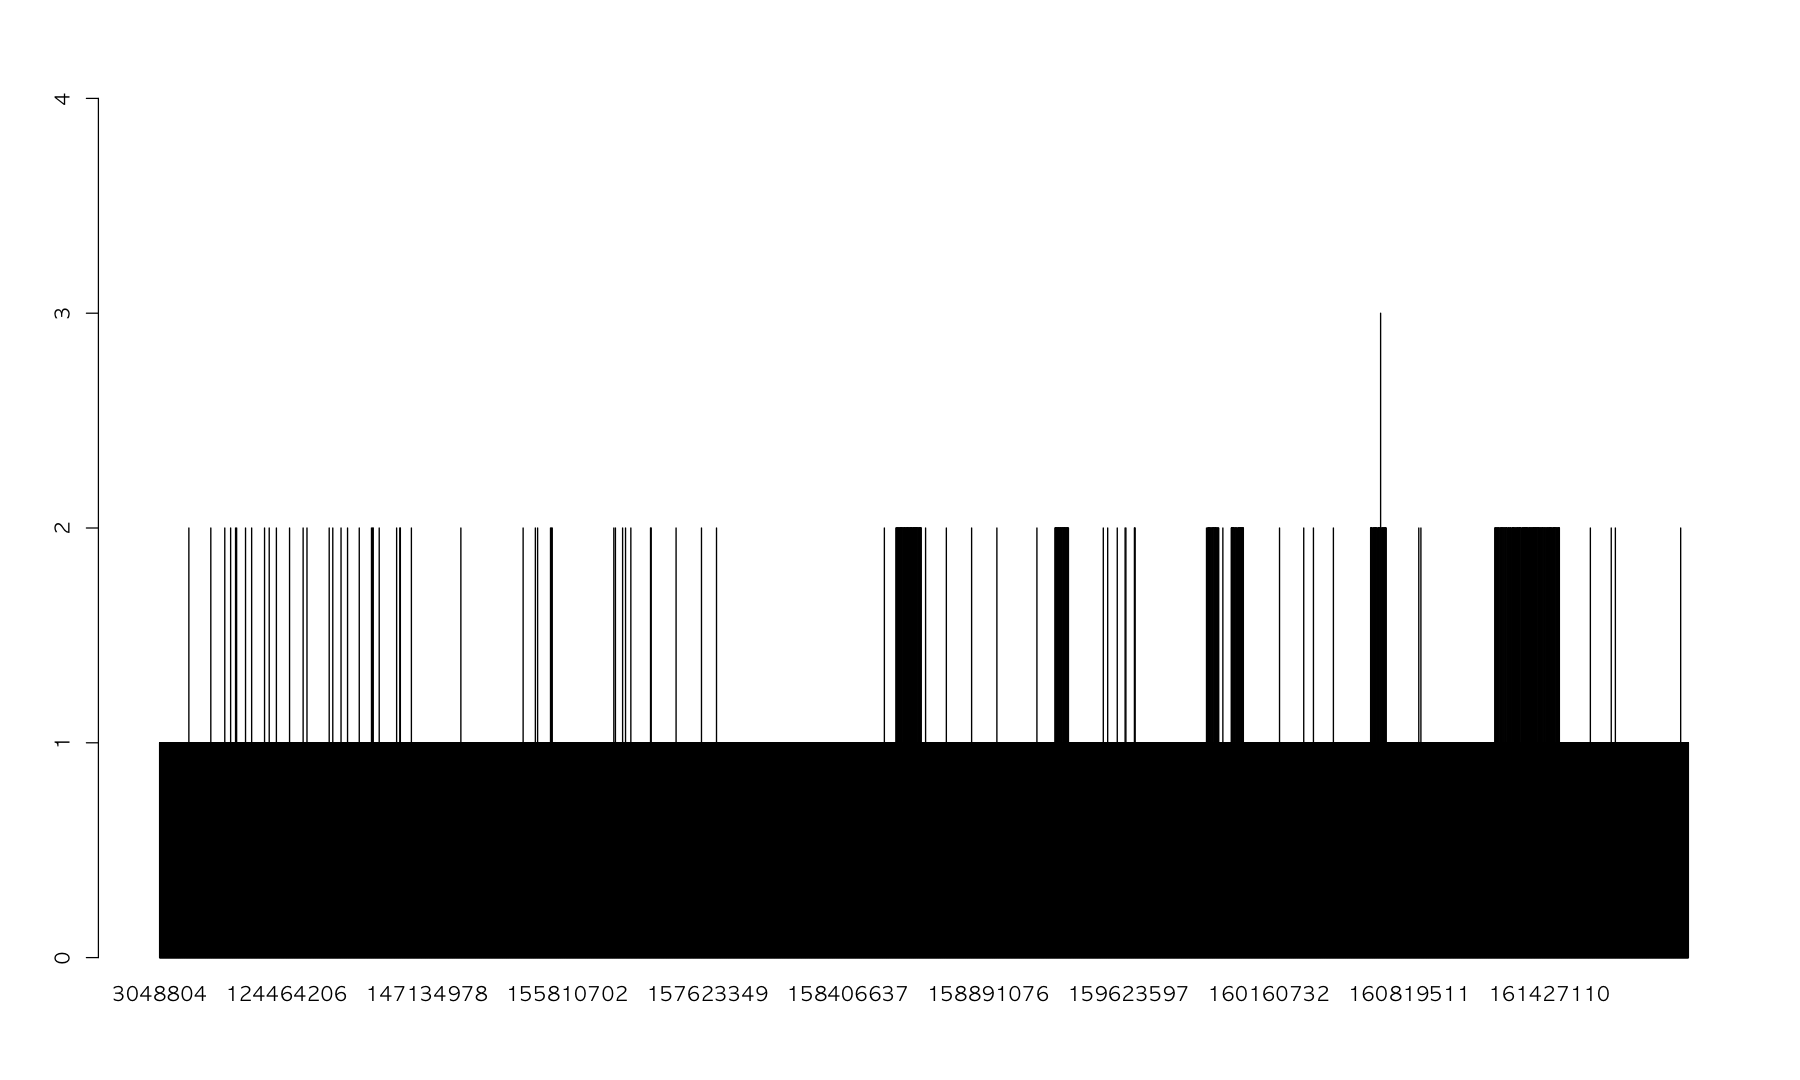

In [481]:
par(family="AppleGothic", bg="white")
barplot(table(kbeef$개체번호), ylim=c(0, 4))
max(table(kbeef$개체번호))

In [482]:
subset(kbeef, kbeef$개체번호 == 100114951 | kbeef$개체번호 == 107036718)            
# 중복된 소가 나오는 경우가 어떤 경우인지 보고자 임의로 찾아봄.

,일자,번호,출하주,개체번호,성별,kpn,계대,중량,최저가,낙찰가,상태,비고,종류,지역
,<chr>,<int>,<chr>,<int>,<chr>,<dbl>,<dbl>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>
2091,2021.03.18,39,변*조,100114951,암,943,5,540,390,395,낙찰,,큰소,경상남도 합천
5980,2021.07.15,74,전*환,100114951,암,943,5,660,600,611,낙찰,임신키트 임신우확인,큰소,경상남도 합천
10746,2021.08.09,348,김*남,107036718,암,872,2,0,530,530,낙찰,,큰소,전라남도 강진.완도
12782,2021.08.29,322,한*용,107036718,암,872,2,0,600,611,낙찰,,큰소,전라남도 강진.완도


In [483]:
uniqBeef <- subset(kbeef, duplicated(kbeef$개체번호)==F)     # 중복되어 나온 소를 제외한 데이터 셋 추출
rownames(uniqBeef) <- c()                                   # 중복 제외된 데이터셋 행번호 초기화
nrow(uniqBeef)
head(uniqBeef, 15)
tail(uniqBeef, 15)

[1] 11495

,일자,번호,출하주,개체번호,성별,kpn,계대,중량,최저가,낙찰가,상태,비고,종류,지역
,<chr>,<int>,<chr>,<int>,<chr>,<dbl>,<dbl>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>
1,2021.10.13,107,서*고,150901978,암,0,2,370,430,502,낙찰,임신3개월,큰소,경상북도 고령 성주
2,2021.03.25,15,정*현,158398122,수,1218,2,220,350,399,낙찰,,혈통우,경상남도 합천
3,2021.08.09,112,유*명,160976573,수,1124,3,0,400,440,낙찰,친자일치,큰소,경상남도의령
4,2021.06.10,177,전*환,158403169,암,1283,3,260,330,447,낙찰,,혈통우,경상남도 합천
5,2021.06.29,520,마*준,157254322,수,1197,8,0,390,460,낙찰,,혈통우,전라남도 강진.완도
6,2021.07.13,319,차*원,121754204,암,0,0,0,560,551,낙찰,,큰소,전라남도 함평
7,2021.09.23,235,우*윤,151305332,수,1263,8,280,430,561,낙찰,,혈통우,경상남도 합천
8,2021.07.04,501,문*준,158881129,수,0,4,0,390,417,낙찰,"얼굴모색,꼬리확인",혈통우,전라남도 강진.완도
9,2021.10.11,38,하*권,161427554,암,1420,2,0,340,448,낙찰,친자일치,혈통우,경상남도의령


,일자,번호,출하주,개체번호,성별,kpn,계대,중량,최저가,낙찰가,상태,비고,종류,지역
,<chr>,<int>,<chr>,<int>,<chr>,<dbl>,<dbl>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>
11481,2021.06.29,256,김*운,157078924,암,0,1,0,360,350,낙찰,,혈통우,전라남도 함평
11482,2021.08.31,96,김*식,159978607,수,1278,3,1,390,492,낙찰,,혈통우,경상남도 창녕
11483,2021.09.17,3,이*주,155545495,수,1124,5,0,450,450,낙찰,,혈통우,경상남도고성
11484,2021.11.03,71,전*용,148826177,암,1195,5,450,520,503,낙찰,임신8개월,큰소,경상남도 창녕
11485,2021.06.29,358,최*숙,141904281,암,0,1,0,900,1035,낙찰,공태,큰소,전라남도 함평
11486,2021.10.14,316,변*규,149362539,암,1314,5,250,330,453,낙찰,,혈통우,경상남도 합천
11487,2021.09.15,89,김*호,158748833,암,1145,2,0,370,467,낙찰,,혈통우,경상북도 고령 성주
11488,2021.07.22,119,전*목,159638939,암,1215,2,240,340,439,낙찰,,혈통우,경상남도 합천
11489,2021.07.01,61,서*교,55688767,암,614,3,580,460,525,낙찰,,큰소,경상남도 합천


In [484]:
# 낙찰가격 순으로 정렬 후 가설 세우기
library(dplyr)
uniqBeef <- arrange(uniqBeef, desc(낙찰가))
head(uniqBeef, 15)
tail(uniqBeef, 15)

,일자,번호,출하주,개체번호,성별,kpn,계대,중량,최저가,낙찰가,상태,비고,종류,지역
,<chr>,<int>,<chr>,<int>,<chr>,<dbl>,<dbl>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>
1,2021.10.09,329,김*준,133677315,암,0,2,0,1050,1229,낙찰,,큰소,전라남도 강진.완도
2,2021.10.14,390,안*준,140704804,암,1116,2,0,1000,1220,낙찰,숫송158750377포함,큰소,전라남도 강진.완도
3,2021.06.19,397,이*식,122472284,암,0,3,0,1150,1210,낙찰,재3508419/미이표송아지포함,큰소,전라남도 강진.완도
4,2021.06.14,346,김*성,117939628,암,0,0,0,980,1150,낙찰,암송159868653포함,큰소,전라남도 강진.완도
5,2021.08.19,331,김*미,128991783,암,1055,5,0,1040,1107,낙찰,,큰소,전라남도 강진.완도
6,2021.06.14,343,김*성,137631140,암,0,0,0,980,1101,낙찰,숫송159868688포함,큰소,전라남도 강진.완도
7,2021.07.20,336,박*규,137847276,암,0,1,0,980,1082,낙찰,공태60일,큰소,전라남도 함평
8,2021.08.11,73,김*출,125233794,암,995,3,570,910,1080,낙찰,임신2개월,큰소,경상북도 고령 성주
9,2021.08.03,357,최*숙,126012387,암,0,1,0,980,1061,낙찰,재/3135425 공태60일,큰소,전라남도 함평


,일자,번호,출하주,개체번호,성별,kpn,계대,중량,최저가,낙찰가,상태,비고,종류,지역
,<chr>,<int>,<chr>,<int>,<chr>,<dbl>,<dbl>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>
11481,2021.06.22,190,정*섭,157091695,수,1291,1,0,180,180,낙찰,뒷발 상처 앞발확인 3,혈통우,전라남도 함평
11482,2021.09.09,228,최*의,160189526,암,1144,6,150,170,176,낙찰,,혈통우,경상남도 합천
11483,2021.09.23,391,정*지,160190761,암,1225,7,220,170,174,낙찰,"개월령확인,후지발목확인",혈통우,경상남도 합천
11484,2021.06.16,14,이*희,16883678,암,0,0,374,150,166,낙찰,입 주위 이모색,큰소,경상남도 창녕
11485,2021.05.20,41,황*분,39828998,암,610,3,320,130,163,낙찰,,큰소,경상남도 합천
11486,2021.09.08,15,서*국,52205157,암,666,1,320,160,161,낙찰,,큰소,경상북도 고령 성주
11487,2021.03.18,21,강*일,199961489,암,336,2,390,140,145,낙찰,,큰소,경상남도 합천
11488,2021.10.28,33,박*숙,161749086,수,1212,7,110,130,133,낙찰,,혈통우,경상남도 합천
11489,2021.09.15,51,정*주,182734656,암,407,1,355,150,133,낙찰,,큰소,경상남도 창녕


시세와 출하주, 중량을 제외했을 때 낙찰 가격에 영향을 미치는 변수 찾기 - 낙찰가의 기준이 되길 바람
본 분석은 시세, 출하주, 중량, 임신 여부 등을 제외하고 kpn과 계대, 종류, 지역 변수로만 비교함.
1. 성별이 여자이고 큰 소일수록 높은 가격일 것이다.
2. 성별이 남자이고 혈통우 일수록 높은 가겨일 것이다.
3. 낙찰가에 관련이 있어보이는 변수 : 성별, 

- 수소와 암소의 낙찰 비율
- 지역별 낙찰 비율
- 지역별 소 종류 비율

상관관계
t검정

In [485]:
# 일자, 번호, 출하주, 개체번호, 중량, 상태(어차피 낙찰된 애들만 있으니까), 비고 제외
beefData <- uniqBeef[,-c(1:4, 8, 11, 12)]

In [486]:
head(beefData)
tail(beefData)

,성별,kpn,계대,최저가,낙찰가,종류,지역
,<chr>,<dbl>,<dbl>,<int>,<int>,<chr>,<chr>
1,암,0,2,1050,1229,큰소,전라남도 강진.완도
2,암,1116,2,1000,1220,큰소,전라남도 강진.완도
3,암,0,3,1150,1210,큰소,전라남도 강진.완도
4,암,0,0,980,1150,큰소,전라남도 강진.완도
5,암,1055,5,1040,1107,큰소,전라남도 강진.완도
6,암,0,0,980,1101,큰소,전라남도 강진.완도


,성별,kpn,계대,최저가,낙찰가,종류,지역
,<chr>,<dbl>,<dbl>,<int>,<int>,<chr>,<chr>
11490,암,542,4,130,132,큰소,경상남도 합천
11491,암,0,0,160,131,큰소,경상남도 창녕
11492,암,0,0,110,115,큰소,경상남도고성
11493,암,0,0,110,111,큰소,경상남도 창녕
11494,암,0,0,70,61,큰소,경상남도 창녕
11495,수,1264,3,55,55,혈통우,전라남도 강진.완도


In [487]:
str(beefData)

'data.frame':	11495 obs. of  7 variables:
 $ 성별  : chr  "암" "암" "암" "암" ...
 $ kpn   : num  0 1116 0 0 1055 ...
 $ 계대  : num  2 2 3 0 5 0 1 3 1 1 ...
 $ 최저가: int  1050 1000 1150 980 1040 980 980 910 980 1050 ...
 $ 낙찰가: int  1229 1220 1210 1150 1107 1101 1082 1080 1061 1060 ...
 $ 종류  : chr  "큰소" "큰소" "큰소" "큰소" ...
 $ 지역  : chr  "전라남도 강진.완도" "전라남도 강진.완도" "전라남도 강진.완도" "전라남도 강진.완도" ...


In [488]:
sum(table(beefData$성별))
table(beefData$성별)

[1] 11495


     거세   수   암   프 
   1   76 6492 4918    8 

In [489]:
# 아무 값도 없는 성별 -> 수소의 비율이 높으므로 수소로 값 대체
beefData$성별 <- ifelse(beefData$성별=="", "수", beefData$성별)
table(beefData$성별)
sum(is.na(beefData$성별))


거세   수   암   프 
  76 6493 4918    8 

[1] 0

소의 생식 능력도 낙찰가에 영향을 미칠거라 생각하기 때문에 임의로 변경하지 않을 예정. 

In [490]:
sum(is.na(beefData$kpn))
sum(is.na(beefData$계대))

[1] 7

[1] 7

In [491]:
subset(kbeef, is.na(kbeef$kpn)==T | is.na(kbeef$계대)==T)
nrow(subset(beefData, is.na(beefData$kpn)==T | is.na(beefData$계대)==T)) 
nrow(subset(beefData, is.na(beefData$kpn)==T | is.na(beefData$계대)==T)) / nrow(beefData)

,일자,번호,출하주,개체번호,성별,kpn,계대,중량,최저가,낙찰가,상태,비고,종류,지역
,<chr>,<int>,<chr>,<int>,<chr>,<dbl>,<dbl>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>
3890,2021.11.02,257,김*일,161774065,암,NA,NA,0,330,340,낙찰,,혈통우,전라남도 함평
7922,2021.11.04,301,박*홍,96340684,,NA,NA,0,450,471,낙찰,,큰소,전라남도 강진.완도
9018,2021.11.02,190,나*희,162068792,수,NA,NA,0,350,415,낙찰,,혈통우,전라남도 함평
9229,2021.11.02,191,나*희,161774073,수,NA,NA,0,380,428,낙찰,,혈통우,전라남도 함평
9450,2021.11.02,259,김*일,161774049,암,NA,NA,0,350,360,낙찰,,혈통우,전라남도 함평
9865,2021.11.02,260,김*규,157078641,암,NA,NA,0,330,342,낙찰,오른쪽뒷발목확인,혈통우,전라남도 함평
12152,2021.11.02,258,김*일,160711815,암,NA,NA,0,350,375,낙찰,,혈통우,전라남도 함평


[1] 7

[1] 0.0006089604

kpn과 계대가 결측치인 데이터 -> 전체의 0.06% 이므로 삭제하고 진행.

In [492]:
nrow(na.omit(beefData)) == nrow(beefData) - 7

[1] TRUE

In [493]:
beefData <- na.omit(beefData)
sum(is.na(beefData))

[1] 0

In [494]:
sum(is.na(beefData$최저가))
sum(is.na(beefData$낙찰가))

[1] 0

[1] 0

In [495]:
# 소 종류 결측값 및 이상치 확인
sum(table(beefData$종류)) == 2987 + 8501  
sum(table(beefData$종류)) == nrow(beefData) 
table(beefData$종류)
sum(is.na(beefData$종류))

[1] TRUE

[1] TRUE


  큰소 혈통우 
  2987   8501 

[1] 0

In [496]:
# 지역 결측값 및 이상치 확인
sum(table(beefData$지역)) == nrow(beefData) 
table(beefData$지역)
sum(is.na(beefData$지역))

[1] TRUE


     경상남도 창녕      경상남도 합천       경상남도고성       경상남도의령 
              1349               3612               1047               1067 
경상북도 고령 성주 전라남도 강진.완도      전라남도 함평 
               846               1829               1738 

[1] 0

In [497]:
str(beefData)

'data.frame':	11488 obs. of  7 variables:
 $ 성별  : chr  "암" "암" "암" "암" ...
 $ kpn   : num  0 1116 0 0 1055 ...
 $ 계대  : num  2 2 3 0 5 0 1 3 1 1 ...
 $ 최저가: int  1050 1000 1150 980 1040 980 980 910 980 1050 ...
 $ 낙찰가: int  1229 1220 1210 1150 1107 1101 1082 1080 1061 1060 ...
 $ 종류  : chr  "큰소" "큰소" "큰소" "큰소" ...
 $ 지역  : chr  "전라남도 강진.완도" "전라남도 강진.완도" "전라남도 강진.완도" "전라남도 강진.완도" ...
 - attr(*, "na.action")= 'omit' Named int [1:7] 5798 7891 8449 9744 10214 10624 10654
  ..- attr(*, "names")= chr [1:7] "5798" "7891" "8449" "9744" ...


In [498]:
beefData$성별 <- as.factor(beefData$성별)
beefData$종류 <- as.factor(beefData$종류)
beefData$지역 <- as.factor(beefData$지역)

In [499]:
str(beefData)
11495 - 11488           # (결측치 제거 전 - 결측치 제거 후 = 7 이면 정상)

'data.frame':	11488 obs. of  7 variables:
 $ 성별  : Factor w/ 4 levels "거세","수","암",..: 3 3 3 3 3 3 3 3 3 3 ...
 $ kpn   : num  0 1116 0 0 1055 ...
 $ 계대  : num  2 2 3 0 5 0 1 3 1 1 ...
 $ 최저가: int  1050 1000 1150 980 1040 980 980 910 980 1050 ...
 $ 낙찰가: int  1229 1220 1210 1150 1107 1101 1082 1080 1061 1060 ...
 $ 종류  : Factor w/ 2 levels "큰소","혈통우": 1 1 1 1 1 1 1 1 1 1 ...
 $ 지역  : Factor w/ 7 levels "경상남도 창녕",..: 6 6 6 6 6 6 7 5 7 6 ...
 - attr(*, "na.action")= 'omit' Named int [1:7] 5798 7891 8449 9744 10214 10624 10654
  ..- attr(*, "names")= chr [1:7] "5798" "7891" "8449" "9744" ...


[1] 7

In [500]:
rownames(beefData) <- c()
head(beefData)
tail(beefData)
nrow(beefData)

,성별,kpn,계대,최저가,낙찰가,종류,지역
,<fct>,<dbl>,<dbl>,<int>,<int>,<fct>,<fct>
1,암,0,2,1050,1229,큰소,전라남도 강진.완도
2,암,1116,2,1000,1220,큰소,전라남도 강진.완도
3,암,0,3,1150,1210,큰소,전라남도 강진.완도
4,암,0,0,980,1150,큰소,전라남도 강진.완도
5,암,1055,5,1040,1107,큰소,전라남도 강진.완도
6,암,0,0,980,1101,큰소,전라남도 강진.완도


,성별,kpn,계대,최저가,낙찰가,종류,지역
,<fct>,<dbl>,<dbl>,<int>,<int>,<fct>,<fct>
11483,암,542,4,130,132,큰소,경상남도 합천
11484,암,0,0,160,131,큰소,경상남도 창녕
11485,암,0,0,110,115,큰소,경상남도고성
11486,암,0,0,110,111,큰소,경상남도 창녕
11487,암,0,0,70,61,큰소,경상남도 창녕
11488,수,1264,3,55,55,혈통우,전라남도 강진.완도


[1] 11488

In [508]:
str(beefData)

'data.frame':	11488 obs. of  7 variables:
 $ 성별  : Factor w/ 4 levels "거세","수","암",..: 3 3 3 3 3 3 3 3 3 3 ...
 $ kpn   : num  0 1116 0 0 1055 ...
 $ 계대  : num  2 2 3 0 5 0 1 3 1 1 ...
 $ 최저가: int  1050 1000 1150 980 1040 980 980 910 980 1050 ...
 $ 낙찰가: int  1229 1220 1210 1150 1107 1101 1082 1080 1061 1060 ...
 $ 종류  : Factor w/ 2 levels "큰소","혈통우": 1 1 1 1 1 1 1 1 1 1 ...
 $ 지역  : Factor w/ 7 levels "경상남도 창녕",..: 6 6 6 6 6 6 7 5 7 6 ...
 - attr(*, "na.action")= 'omit' Named int [1:7] 5798 7891 8449 9744 10214 10624 10654
  ..- attr(*, "names")= chr [1:7] "5798" "7891" "8449" "9744" ...


데이터 정제 완료

-----

In [501]:
library(plotrix)

In [502]:
# 그래프용 데이터프레임 복사
beefData1 <- beefData
head(beefData1)
beefData1$성별 <- ifelse(beefData1$성별=="거세" | beefData1$성별=="프", "기타", beefData1$성별)
table(beefData1$성별)
round(table(beefData$성별)/nrow(beefData)*100, 2)
round(table(beefData1$성별)/nrow(beefData1)*100, 2)

,성별,kpn,계대,최저가,낙찰가,종류,지역
,<fct>,<dbl>,<dbl>,<int>,<int>,<fct>,<fct>
1,암,0,2,1050,1229,큰소,전라남도 강진.완도
2,암,1116,2,1000,1220,큰소,전라남도 강진.완도
3,암,0,3,1150,1210,큰소,전라남도 강진.완도
4,암,0,0,980,1150,큰소,전라남도 강진.완도
5,암,1055,5,1040,1107,큰소,전라남도 강진.완도
6,암,0,0,980,1101,큰소,전라남도 강진.완도



   2    3 기타 
6490 4914   84 


 거세    수    암    프 
 0.66 56.49 42.78  0.07 


    2     3  기타 
56.49 42.78  0.73 

In [512]:
# vec <- 
as.numeric(beefData[,c(1, 6, 7)])

ERROR: Error in eval(expr, envir, enclos): 'list' object cannot be coerced to type 'double'


In [510]:
cor(beefData$낙찰가, as.numeric(beefData$지역), as.numeric(beefData$성별))


ERROR: Error in if (is.na(na.method)) stop("invalid 'use' argument"): the condition has length > 1


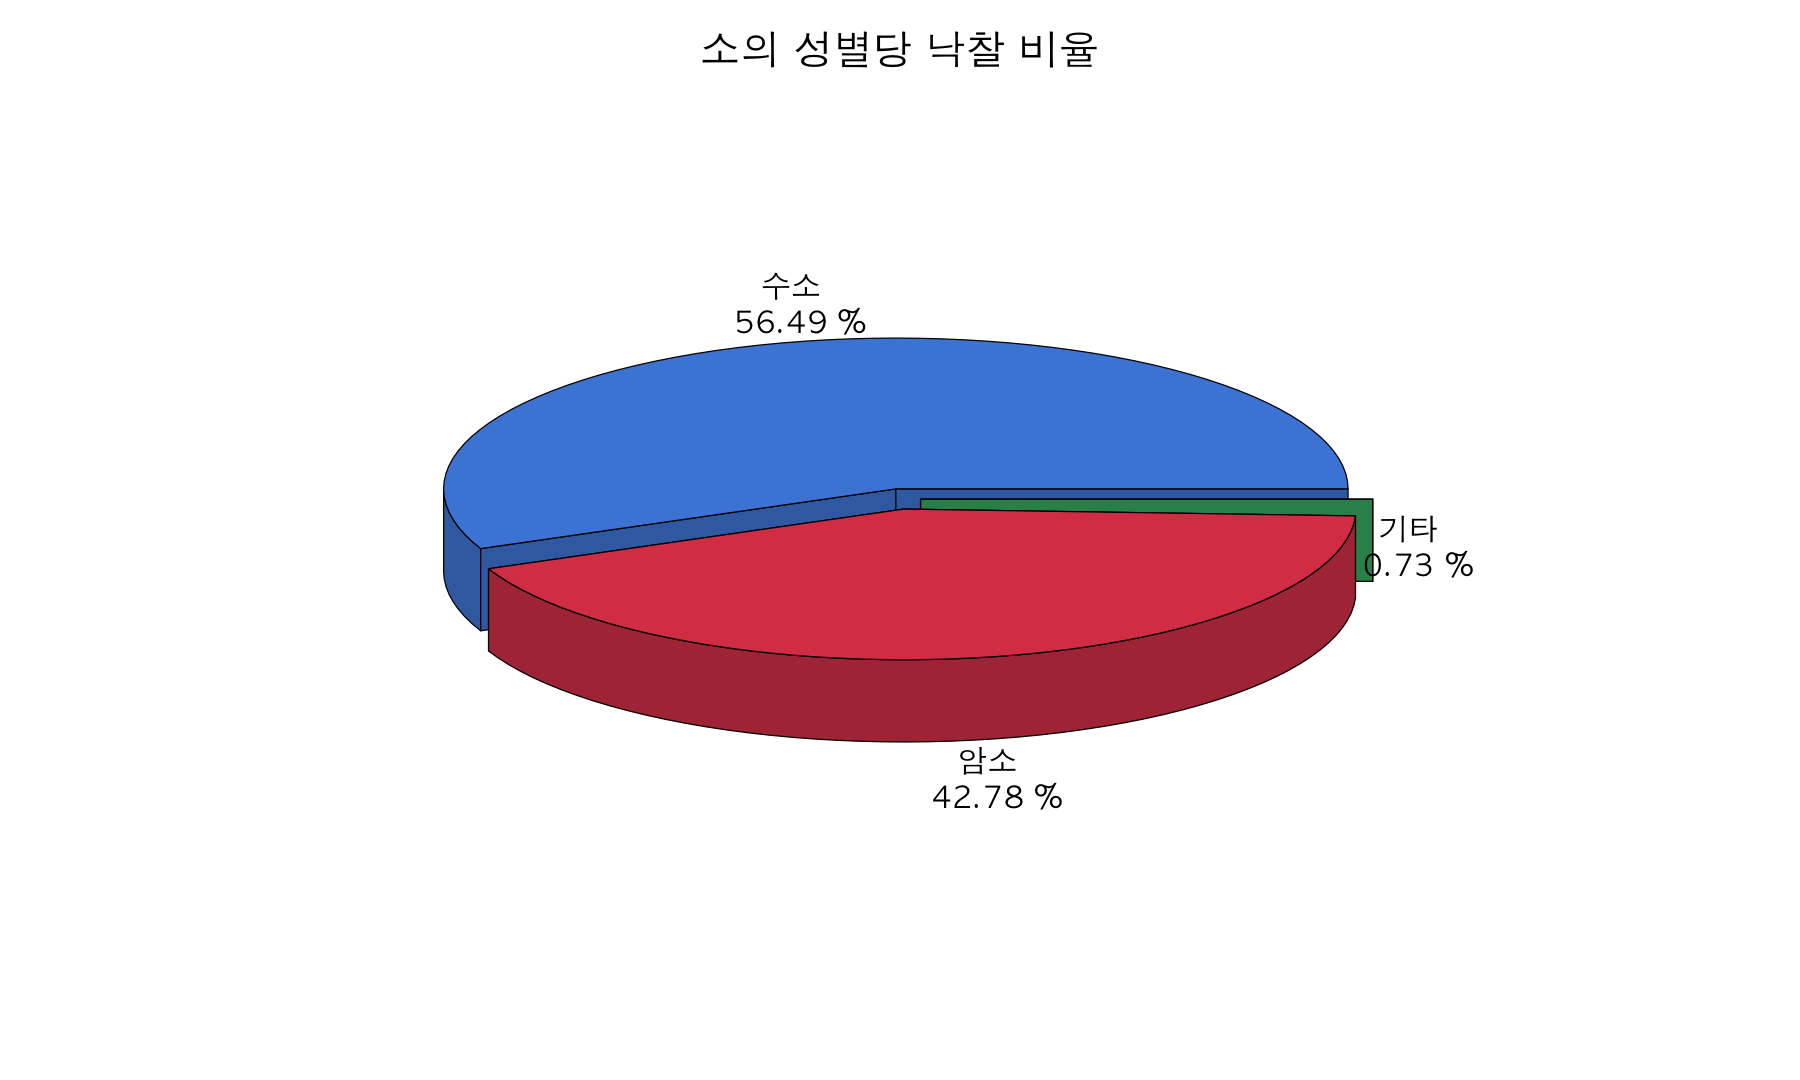

In [503]:
par(family="AppleGothic", bg='white')
ratio <- round(table(beefData1$성별)/nrow(beefData1)*100, 2)
label <- paste(c("수소", "암소", "기타"), "\n", ratio, "%")

pie3D(ratio, 
      main = "소의 성별당 낙찰 비율",
      cex.main = 2, 
      col = c("#4B89DC", "#DB4455", "#3CB371"),
      labels = label,
      explode = 0.05,
      radius = 1.1,
      labelcex = 1.5
)

In [504]:
# 성별 소 종류별 빈도수
table(beefData1$종류, beefData1$성별)

        
            2    3 기타
  큰소    404 2580    3
  혈통우 6086 2334   81

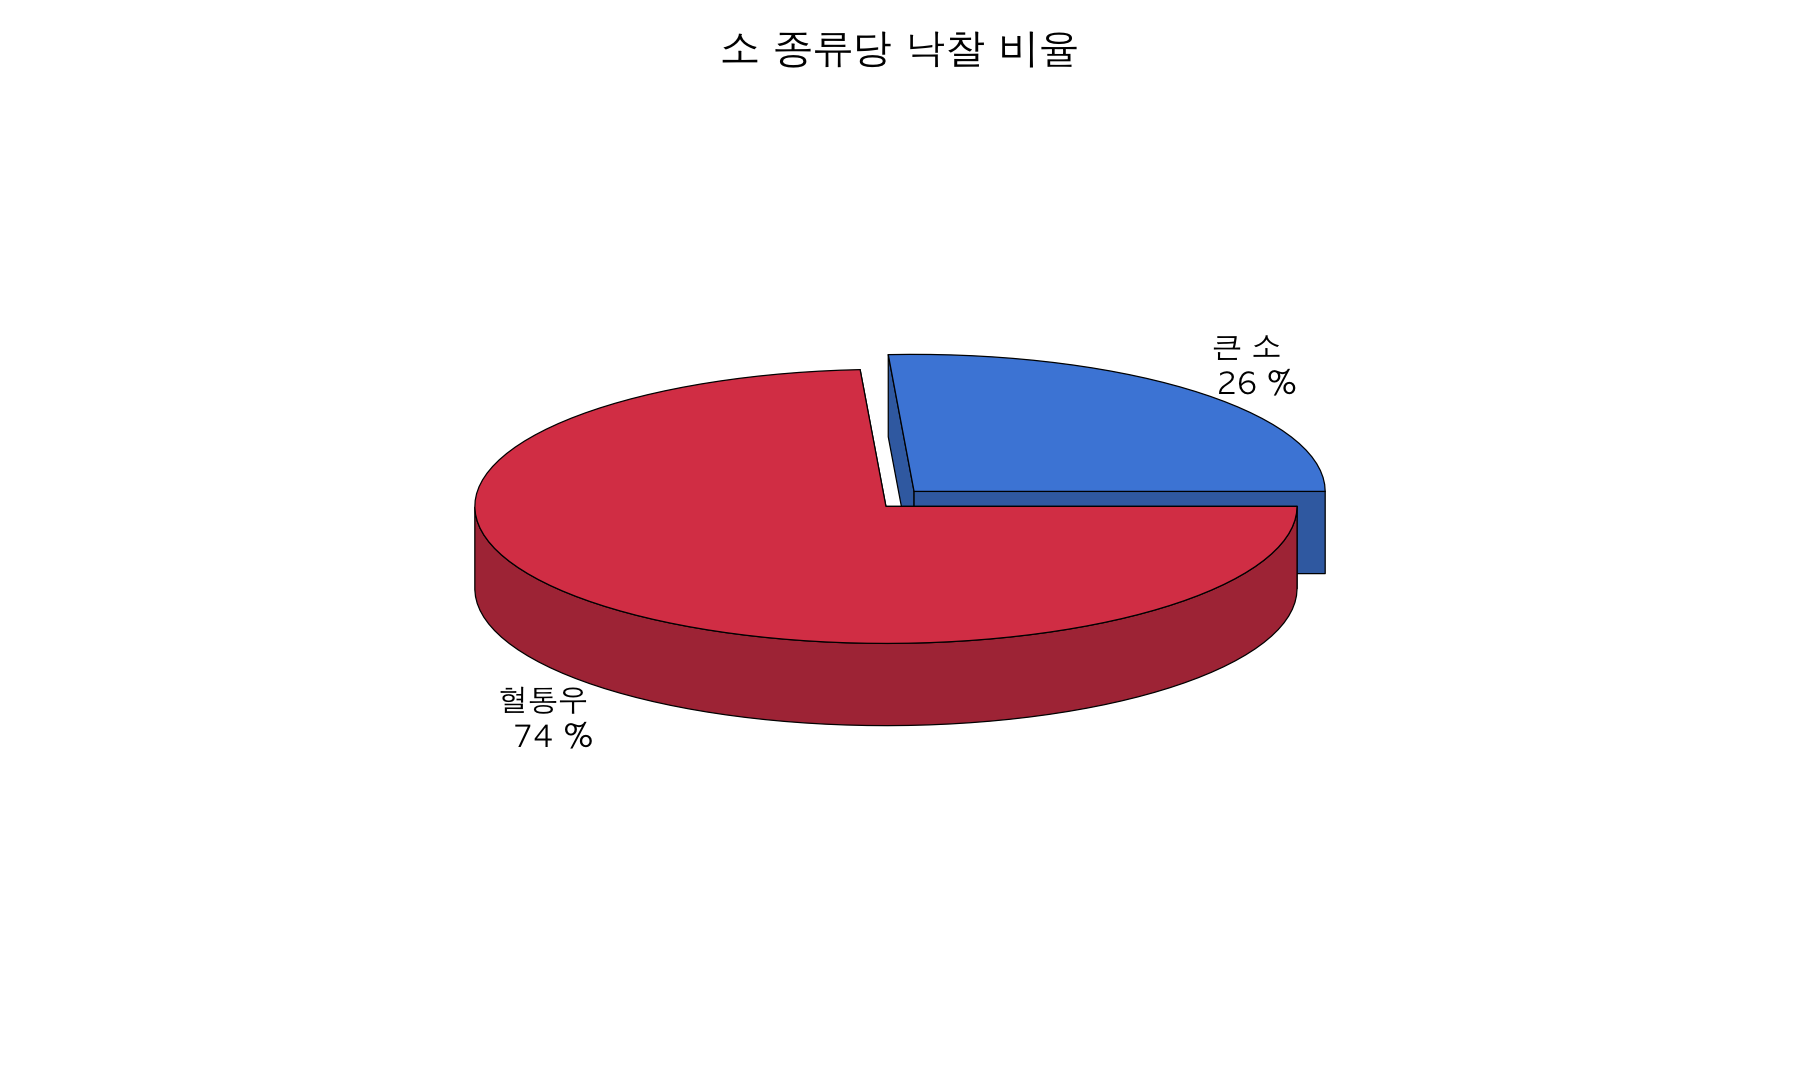

In [505]:
par(family="AppleGothic", bg='white')
ratio <- round(table(beefData$종류)/nrow(beefData)*100, 2)
label <- paste(c("큰 소", "혈통우"), "\n", ratio, "%")

pie3D(ratio, 
      main = "소 종류당 낙찰 비율",
      cex.main = 2, 
      col = c("#4B89DC", "#DB4455"),
      labels = label,
      explode = 0.05,
      radius = 1,
      labelcex = 1.5
)

In [506]:
round(table(beefData$지역)/nrow(beefData)*100, 2)

# 그래프용 데이터프레임 복사
beefData1 <- beefData
head(beefData1)
beefData1$지역 <- arrange(round(table(beefData$지역)/nrow(beefData)*100, 2), desc)
table(beefData1$성별)
round(table(beefData$성별)/nrow(beefData)*100, 2)
round(table(beefData1$성별)/nrow(beefData1)*100, 2)


     경상남도 창녕      경상남도 합천       경상남도고성       경상남도의령 
             11.74              31.44               9.11               9.29 
경상북도 고령 성주 전라남도 강진.완도      전라남도 함평 
              7.36              15.92              15.13 

,성별,kpn,계대,최저가,낙찰가,종류,지역
,<fct>,<dbl>,<dbl>,<int>,<int>,<fct>,<fct>
1,암,0,2,1050,1229,큰소,전라남도 강진.완도
2,암,1116,2,1000,1220,큰소,전라남도 강진.완도
3,암,0,3,1150,1210,큰소,전라남도 강진.완도
4,암,0,0,980,1150,큰소,전라남도 강진.완도
5,암,1055,5,1040,1107,큰소,전라남도 강진.완도
6,암,0,0,980,1101,큰소,전라남도 강진.완도


ERROR: Error in UseMethod("arrange"): 클래스 "table"의 객체에 적용된 'arrange'에 사용할수 있는 메소드가 없습니다


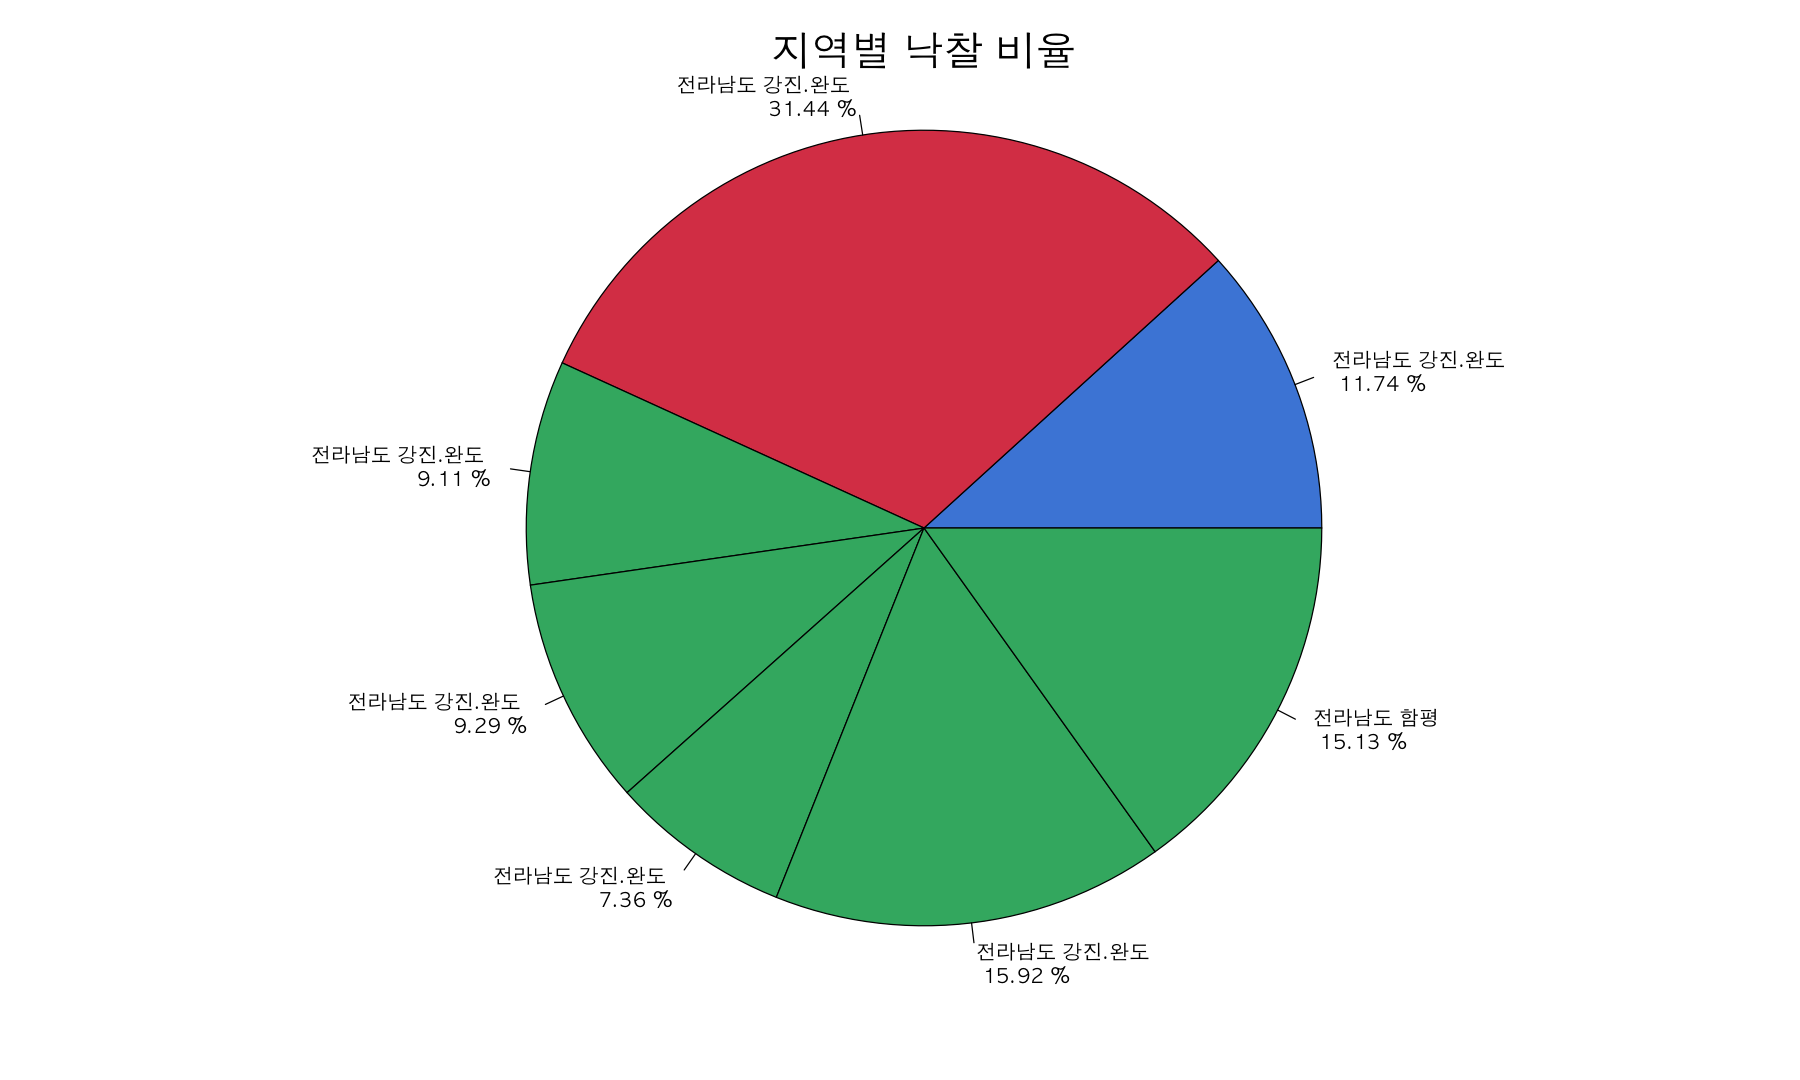

In [ ]:
par(family="AppleGothic", bg='white')
ratio <- round(table(beefData$지역)/nrow(beefData)*100, 2)
label <- paste(beefData$지역, "\n", ratio, "%")

pie(ratio, 
      main = "지역별 낙찰 비율",
      cex.main = 2, 
      col = c("#4B89DC", "#DB4455", rep("#3CB371", 5)),
      labels = label,
      explode = 0.05,
      radius = 1,
      labelcex = 1.5
)

In [ ]:
# 지역별 소 종류 비율 (막대그래프로 비교)

In [ ]:
#회귀분석